In [1]:
#loading Libraries
import numpy as np  
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

In [2]:
#Ploting and Scoring Function
def plot_graphs(trainedalgo, X_Test, Y_Test, Y_hat):
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import plot_precision_recall_curve
    import matplotlib.pyplot as plt
    from sklearn.metrics import plot_confusion_matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(trainedalgo, X_Test, Y_Test,cmap=plt.cm.Blues,normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    print(classification_report(Y_Test,Y_hat))
    import scikitplot as skplt
    y_probas_roc = trainedalgo.predict_proba(X_Test)
    roc = skplt.metrics.plot_roc(Y_Test, y_probas_roc,figsize=(45,45),text_fontsize=100,title_fontsize=150)   
    plt.xlabel('False Positive Rate', fontsize=160)
    plt.ylabel('True Positive Rate', fontsize=160)
    for l in roc.lines:
        l.set_lw(25)
    plt.show()
    #Average Precision score
    from sklearn.metrics import average_precision_score
    average_precision_rand = average_precision_score(Y_Test, Y_hat)
    print('Average precision-recall score Random forest: {0:0.2f}'.format(
          average_precision_rand))
    ## Curve for Randdom forrest
    y_probas = trainedalgo.predict_proba(X_Test)
    ax = skplt.metrics.plot_precision_recall(Y_Test, y_probas,figsize=(45,45),text_fontsize=80,title_fontsize=150)
    plt.xlabel('Recall', fontsize=160)
    plt.ylabel('Precision', fontsize=160)
    plt.xticks(fontsize=100)
    plt.yticks(fontsize=100)
    for l in ax.lines:
        l.set_lw(25)
    plt.show()    
    from sklearn.metrics import precision_recall_fscore_support
    precision_recall_fscore_support(Y_Test, Y_hat)

In [3]:
#Reading CSV File
data = pd.read_excel('Mini_protein_data_Ha_for_ml.xlsx');

In [4]:
#Defining Lables and Features
#Feature Transformations:- Label encoder and Robust Scaler; Feature Extraction
X = data.drop(['Category','Category_0_1','Category_0-1_2_3_4','Category_0_1-2_3_4'], axis = 1)
Y = data['Category_0-1_2_3_4']
X = pd.get_dummies(X, prefix_sep='_')
Y = LabelEncoder().fit_transform(Y)
X = RobustScaler().fit_transform(X)    
#Data Spliting into Training and Testing
x_train, x_test, y_train, y_test =train_test_split(X,Y, random_state =0)
randomforest = RandomForestClassifier(class_weight='balanced')
randomforest.fit(x_train,y_train) #training dataset
sfm = SelectFromModel(randomforest, prefit=True) #feature selection using select from 
x_train = sfm.transform(x_train)
x_test = sfm.transform(x_test)

In [5]:
#Trainig a Random Forest 
randomfor = RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=80, min_samples_leaf=2, min_samples_split=6, n_estimators=200)
randomfor.fit(x_train, y_train)
y_RandomForest = randomfor.predict(x_test)
print("Random forest accuracy Best Kernel score :" , accuracy_score(y_test, y_RandomForest))

Random forest accuracy Best Kernel score : 0.9536052009456265


Confusion matrix, without normalization
[[5687  153]
 [ 161  767]]
Normalized confusion matrix
[[0.97380137 0.02619863]
 [0.17349138 0.82650862]]


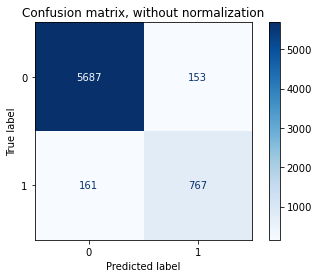

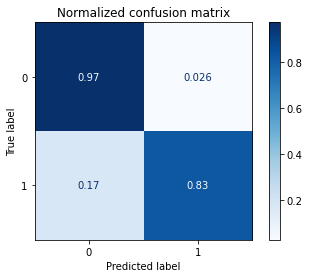

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5840
           1       0.83      0.83      0.83       928

    accuracy                           0.95      6768
   macro avg       0.90      0.90      0.90      6768
weighted avg       0.95      0.95      0.95      6768



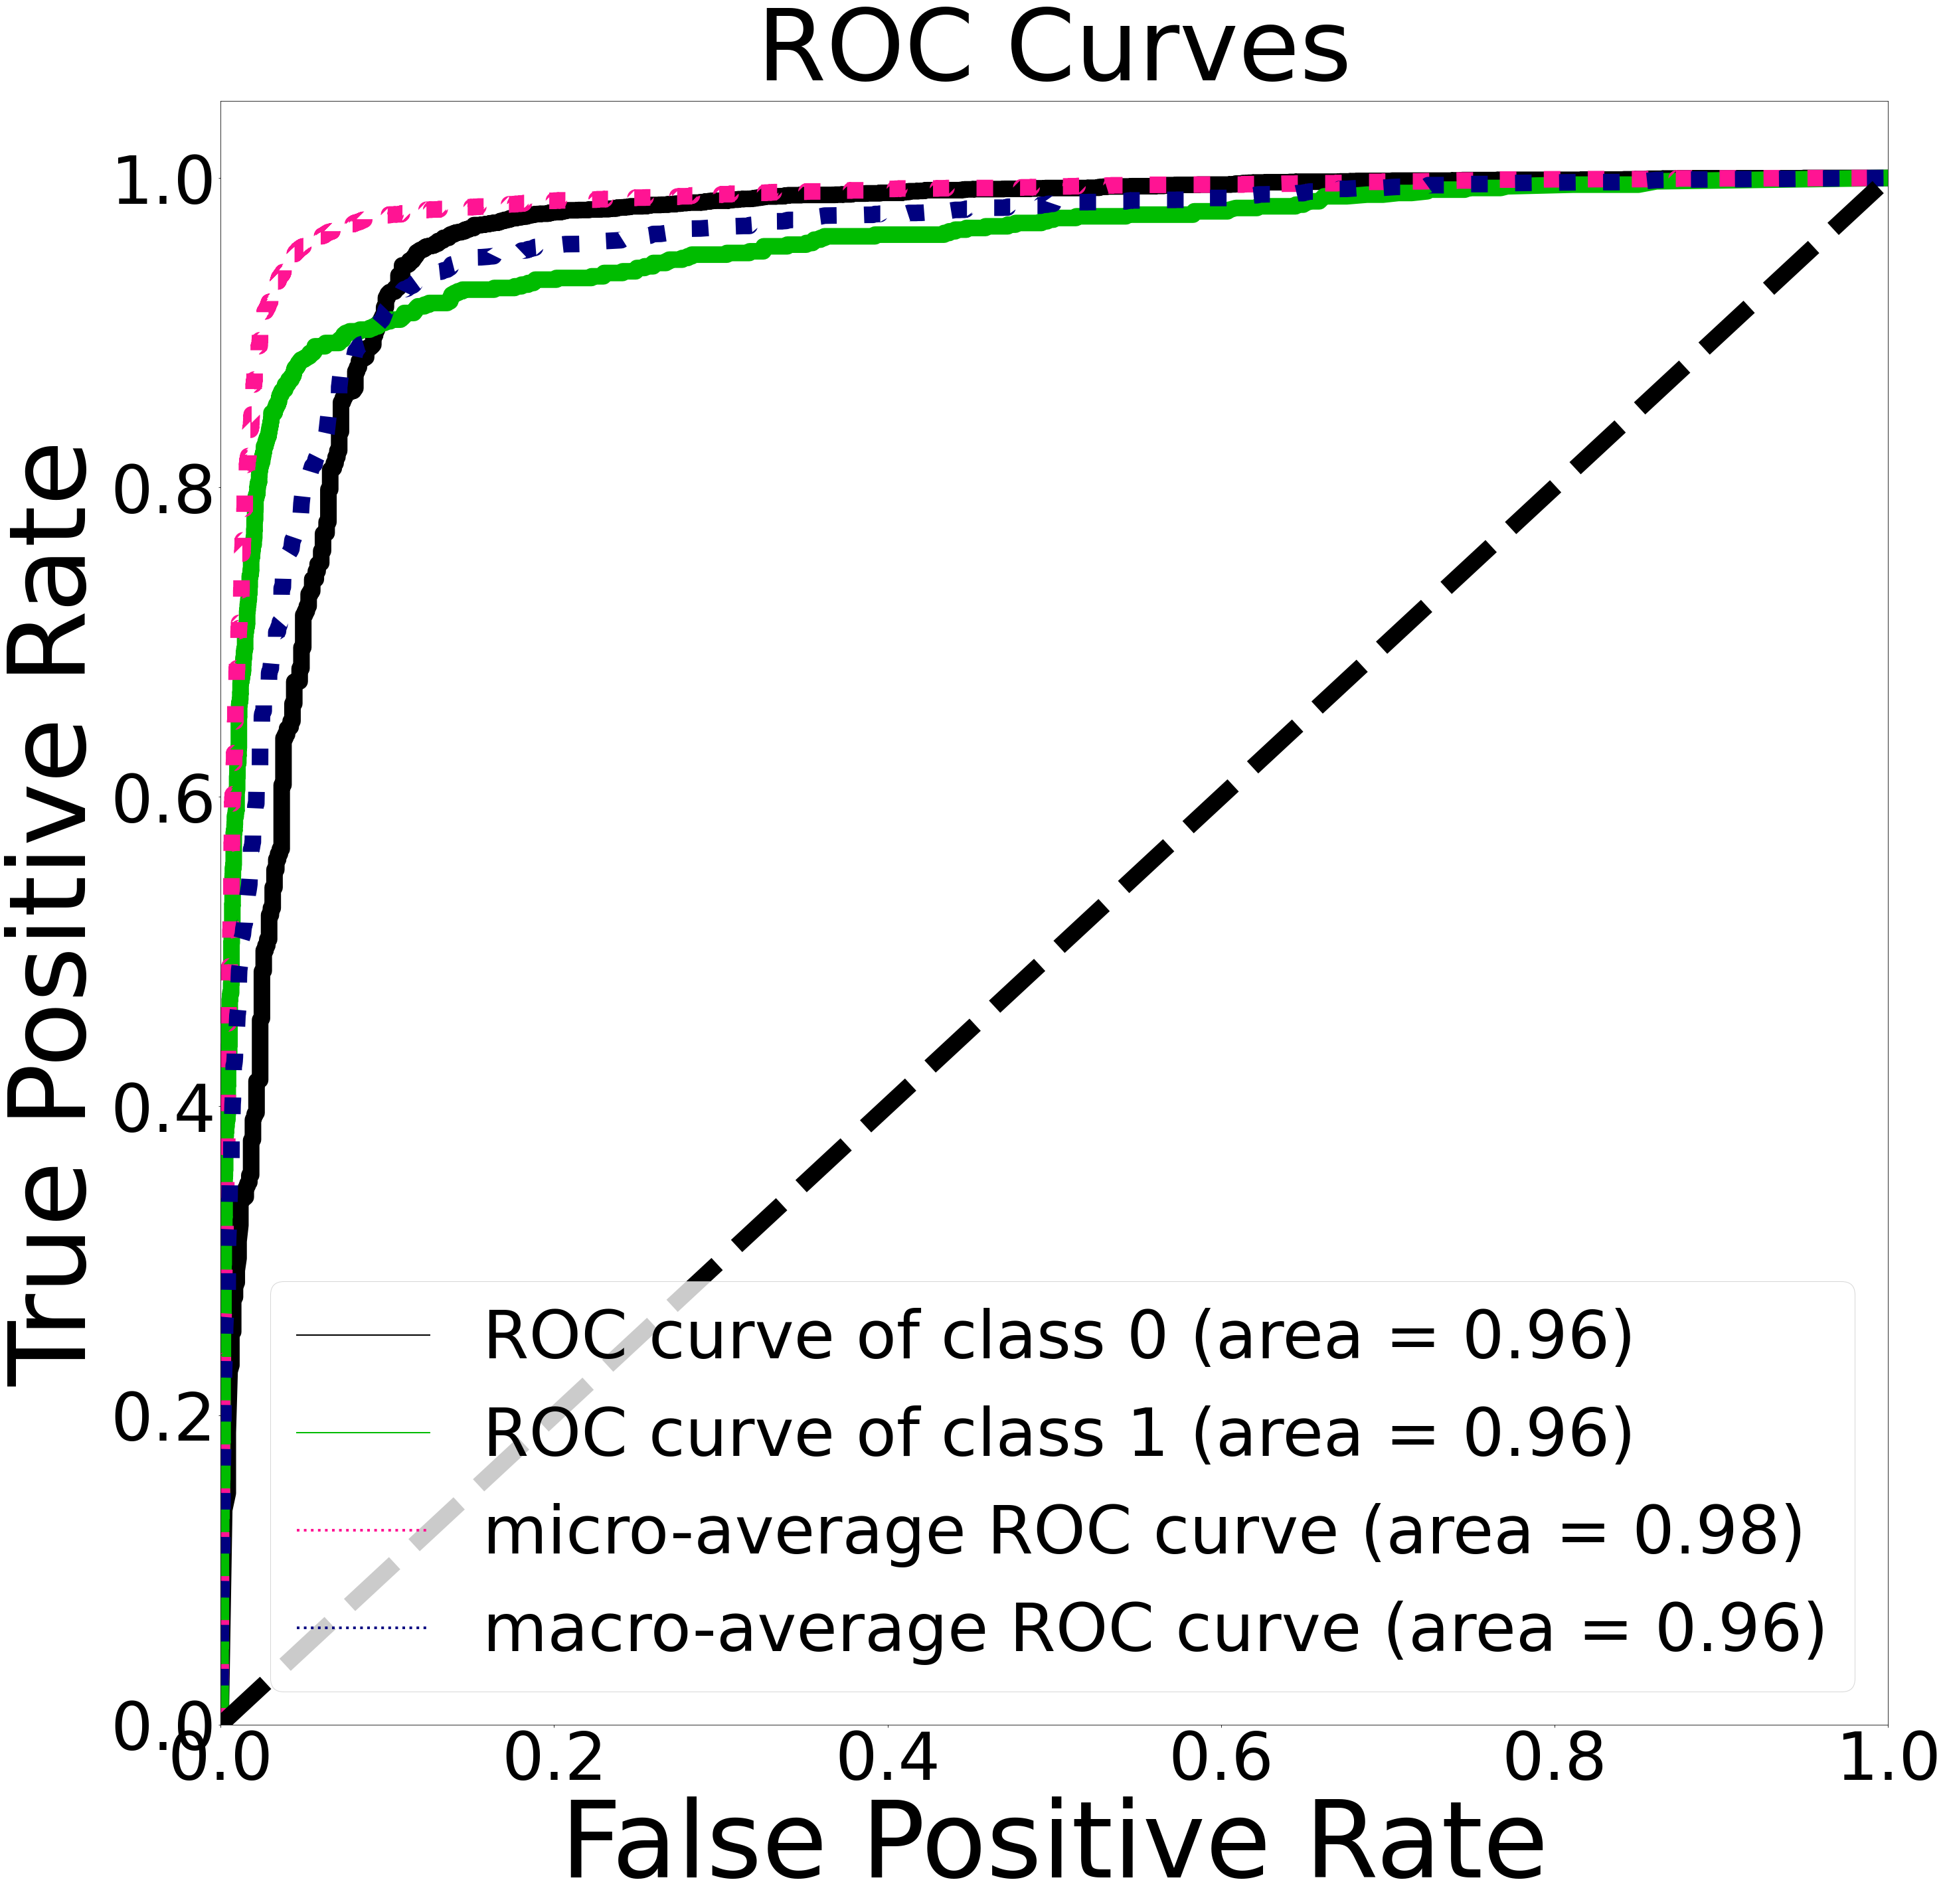

Average precision-recall score Random forest: 0.71


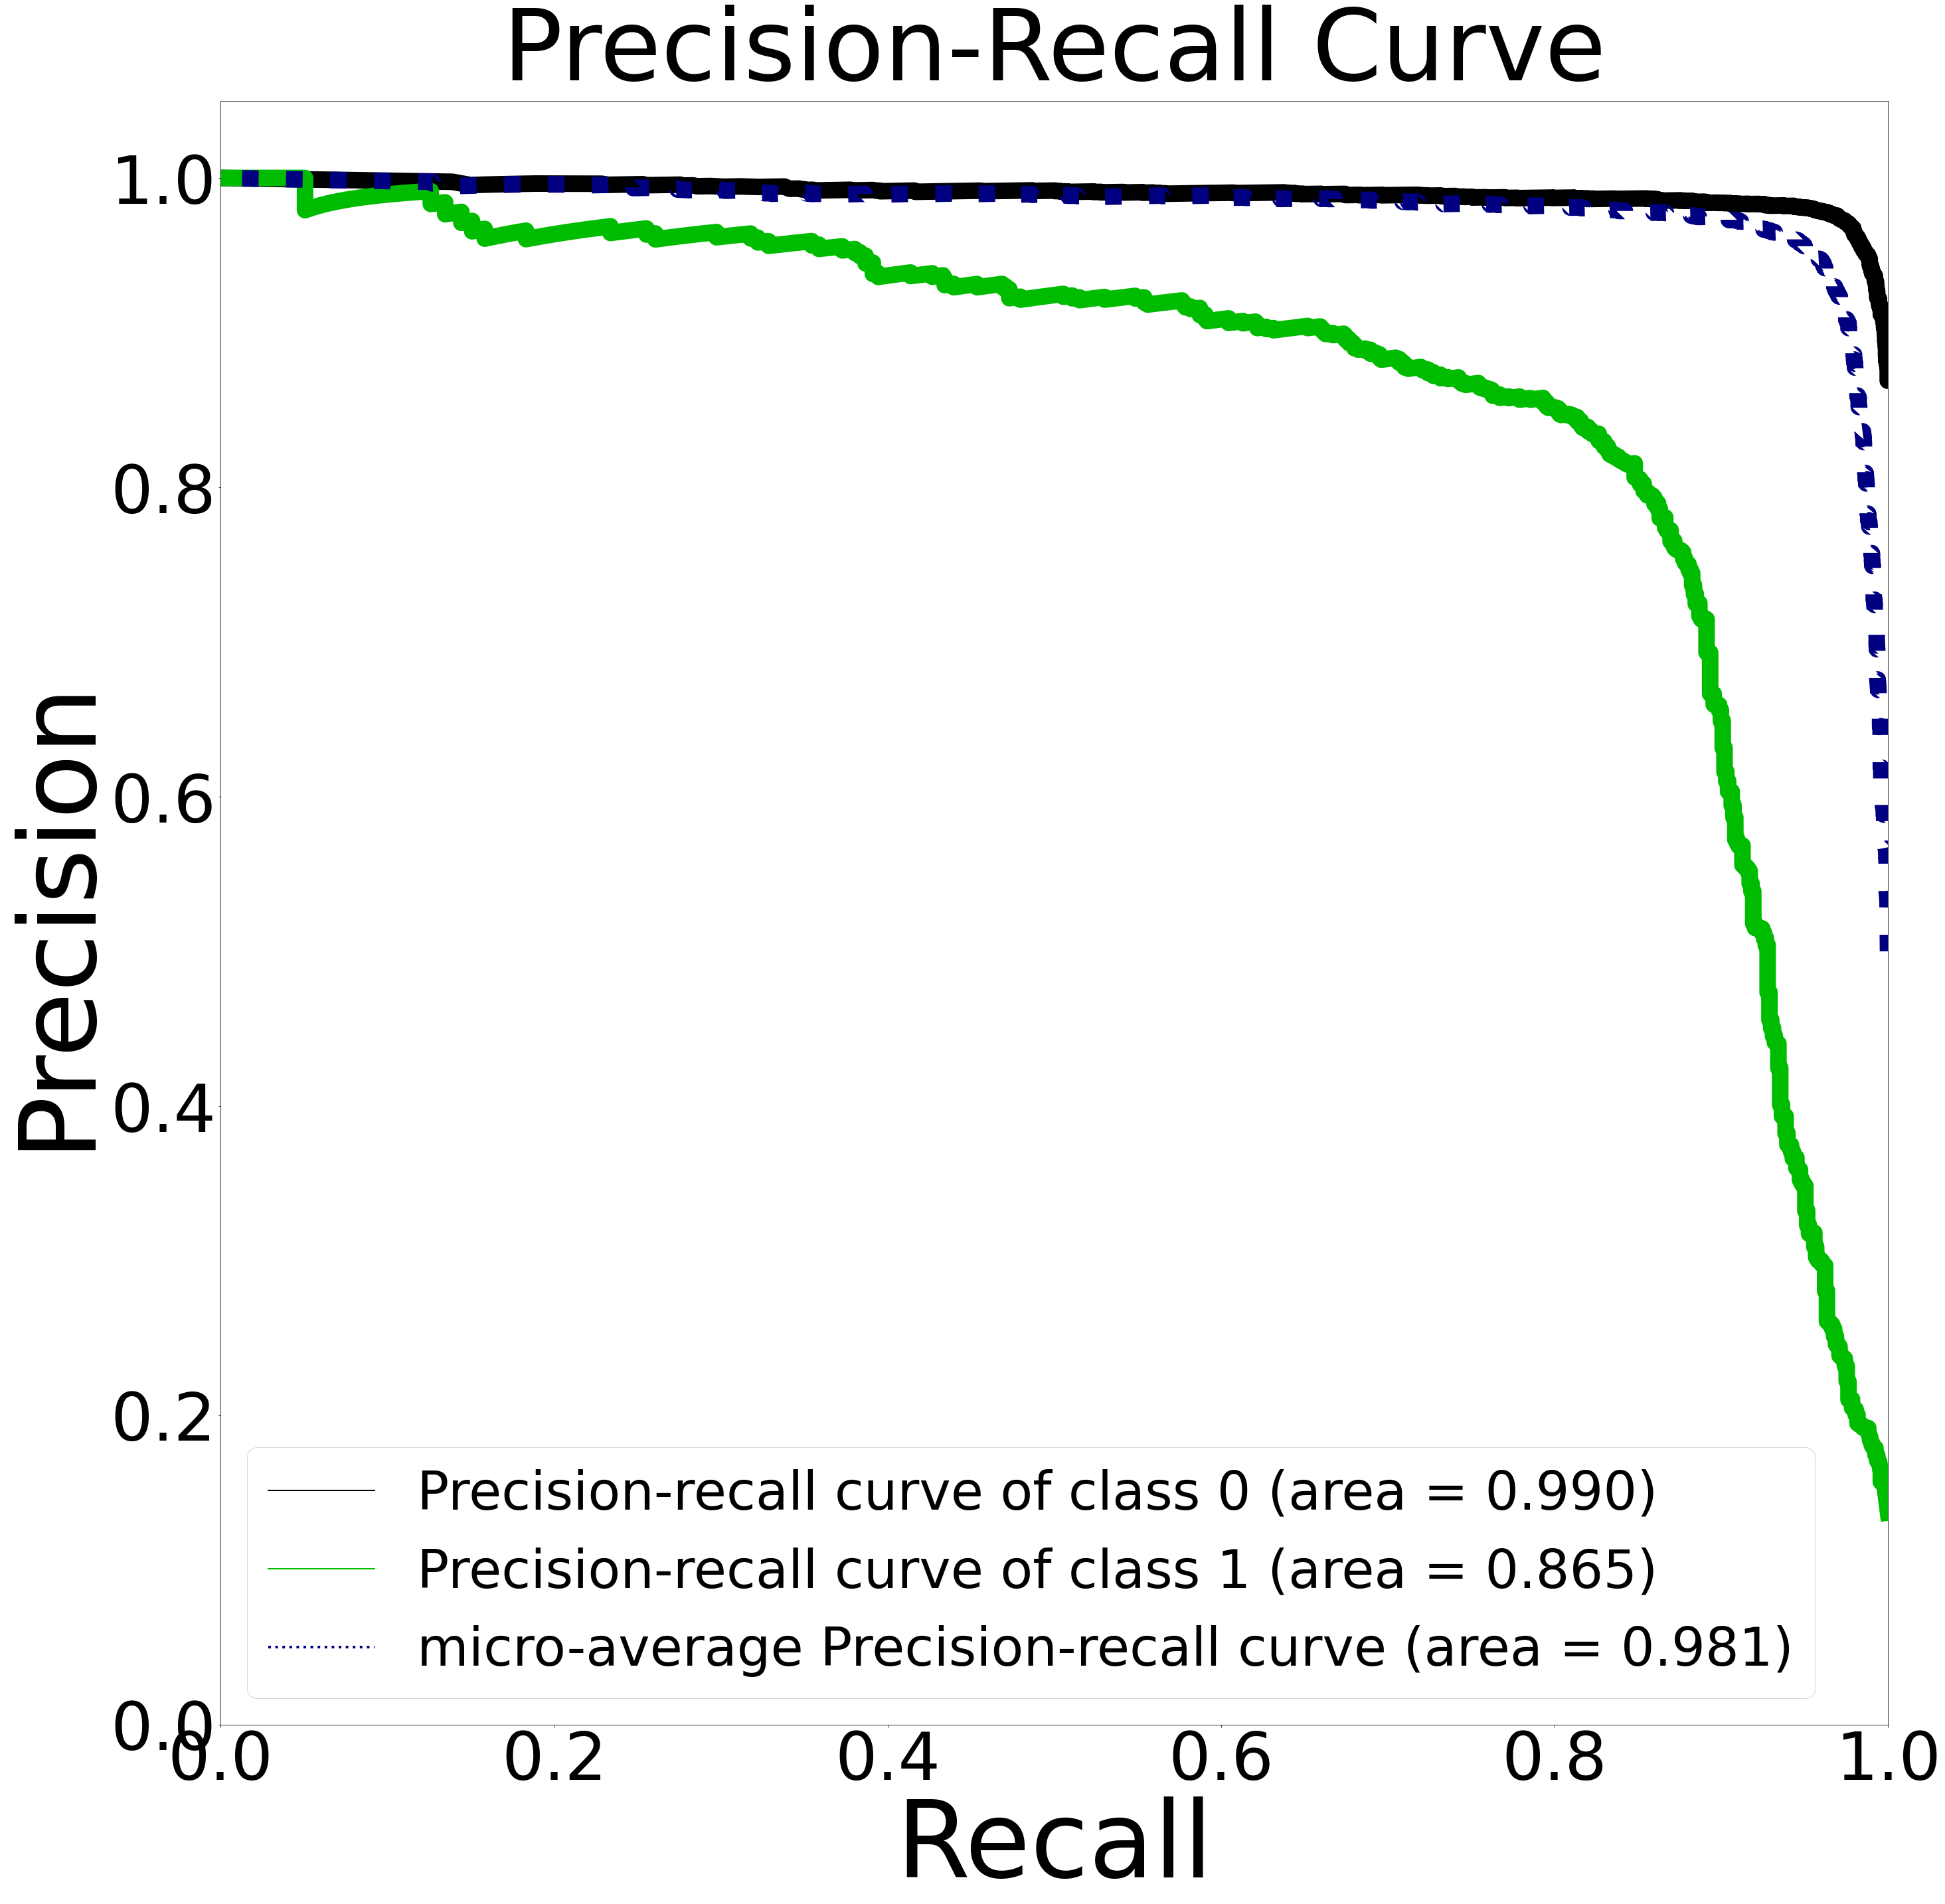

In [6]:
#Evaluation Random Forest
plot_graphs(randomfor,x_test,y_test,y_RandomForest)

In [8]:
import pickle
Pkl_Filename = "HA_dataset_tuned_RandomForest.pkl"  
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(randomfor, file)